# $\text{Imported Libraries and Data}$

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sea
import time

z_obs_val = np.loadtxt("mcmc_mu_data.txt")[:,0]
mu_obs_val = np.loadtxt("mcmc_mu_data.txt")[:,1]
covarince = np.loadtxt("mcmc_covariance_data.txt")

C = covarince.reshape(31,31)
C_inverse = np.linalg.inv(C)

# $\text{Model or Functions}$

In [5]:
def s_(omega_m):
    k = ((1-omega_m)/omega_m)**(1/3)
    return k

def eta(a,omega_m):
    s = s_(omega_m)
    t1 = ((1/a**4)-(0.1540*s/a**3)+0.4304*(s**2)/a**2)
    t2 = ((0.19097*(s**3)/a) + 0.066941*s**4)
    return 2*(np.sqrt(s**3 + 1))*(t1 + t2)**(-1/8)

def D_l(z,omega_m):
    H0 = 100
    c = 3*10**5
    t1 = eta(1,omega_m) - eta(1/(1+z),omega_m)
    return (c*(1+z)/H0)*t1

def mu(z,h,omega_m):
    return 25 - 5*np.log10(h) + 5*np.log10(D_l(z,omega_m))

def like_h(h,omega_m):
    summ = 0
    mu_theory = mu(z_obs_val,h,omega_m)
    for i in range(len(mu_obs_val)):
        for j in range(len(mu_obs_val)):
            summ += (mu_obs_val[i]- mu_theory[i])*C_inverse[i,j]*(mu_obs_val[j]- mu_theory[j])
    return -0.5*summ
### here in likely-hood, we take final value in the form of log. because we were facing some nan values without log


# $\text{Part-1: Importance Sampling}$

## $\text{ MH algorithm}$

In [6]:
def MCMC(steps,h0,omega0,sigma1,sigma2):
    
    burn_in = int(0.2*steps)  ## to burn in some starting values
    
    h_vals = np.zeros(steps)
    omega_vals = np.zeros(steps)
    h_vals[0] = h0                 ## initial value of h and Ω𝑚
    omega_vals[0] = omega0
    
    Accept_value = 0 ## to count acceptance ratio
    
    for i in range(1,steps):
        h_current = h_vals[i-1]
        omega_current = omega_vals[i-1]
        
        ### now we will found proposed value of h and Ω𝑚 by generate random number from uniform distribution

        h_proposed = np.random.normal(h_current,sigma1)
        omega_proposed = np.random.normal(omega_current,sigma2)

        t1 = like_h(h_current,omega_current)*np.random.normal(0.738,0.024) ## likely hood for current h and Ω𝑚
        
        ## since we know that h and Ω𝑚 can not take negative value as well as more than 1,so we put this condition
        if h_proposed<=0 or h_proposed>=1 or  omega_proposed<=0 or omega_proposed>=1:
            t2 = -np.inf     ####here we took infinite value such that likely hood becomes zero for this condition

        else:
            t2 = like_h(h_proposed,omega_proposed)*np.random.normal(0.738,0.024) ## likely hood for proposed h and Ω𝑚
            
        acceptance_prob = min(1,np.exp(t2-t1)) # here we use exponantial because above we took log of likely hood
        
        ## Choosing an random number between 0 and 1
        delta = np.random.rand(1)[0]
        
        if delta<acceptance_prob:
            h_vals[i] = h_proposed
            omega_vals[i] = omega_proposed
            Accept_value += 1
            
        else:
            h_vals[i] = h_current
            omega_vals[i] = omega_current
            
    ### now for Acceptance ratio
    Accept_ratio = Accept_value/steps
            
    return h_vals[burn_in:],omega_vals[burn_in:],Accept_ratio


In [8]:
h_vals1,omega_vals1,ar1 = MCMC(1000,0.2,0.9,0.01,0.03)
h_vals2,omega_vals2,ar2 = MCMC(1000,0.5,0.5,0.01,0.03)
h_vals3,omega_vals3,ar3 = MCMC(1000,0.9,0.2,0.01,0.03)



/tmp/ipykernel_2486/2383116601.py:30: RuntimeWarning: overflow encountered in exp
  acceptance_prob = min(1,np.exp(t2-t1)) # here we use exponantial because above we took log of likely hood


## $\text{Visualization of Data by Histogram and Plots}$

### $\text{Histograms for different ℎ𝑜 & Ω𝑚𝑜 values}$

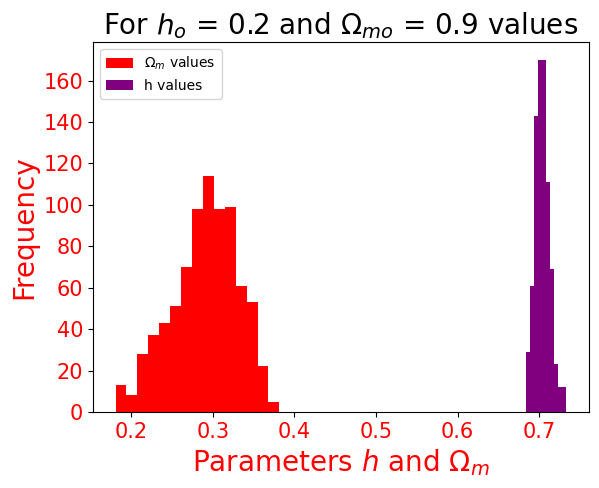

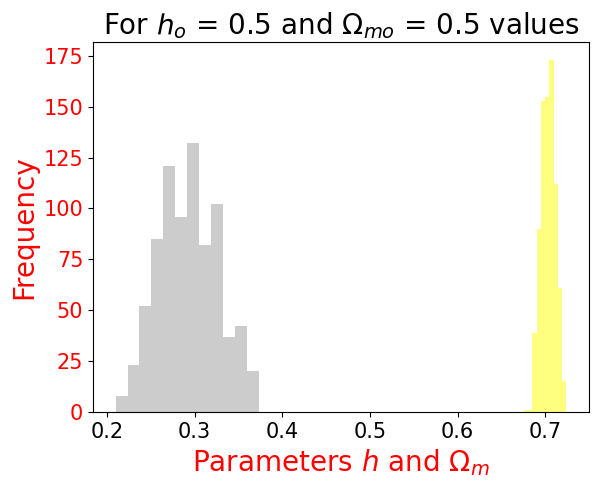

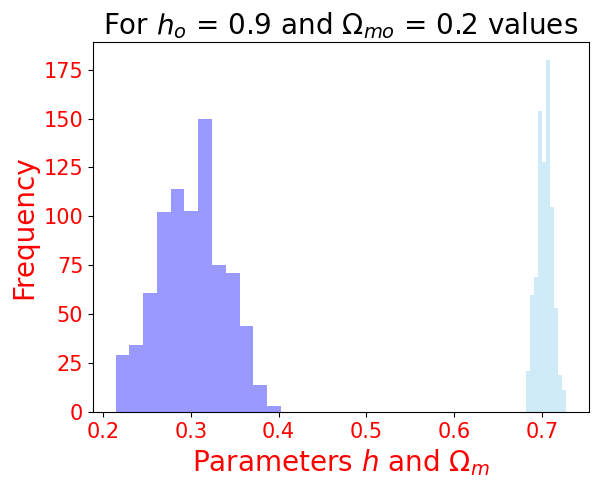

In [9]:
plt.hist(omega_vals1,color = 'red',label = '$\Omega_m $ values ',bins = 15)
plt.hist(h_vals1,color = 'purple',label = 'h values')
plt.title("For $ ℎ_o $ = 0.2 and $\Omega_{mo}$ = 0.9 values",fontsize = 20)
plt.xticks(fontsize = 15,color = 'red')
plt.xlabel('Parameters $ h$ and $\Omega_m$',fontsize = 20,color = 'red')
plt.yticks(fontsize = 15,color = 'red')
plt.ylabel('Frequency',fontsize = 20,color = 'red')
plt.legend()
plt.show()

plt.hist(omega_vals2,color = 'black',label = '$\Omega_m $ values',bins = 12,alpha = 0.2)
plt.hist(h_vals2,color = 'yellow',label = 'h values',alpha = 0.5)
plt.title("For $ ℎ_o $ = 0.5 and $\Omega_{mo}$ = 0.5 values",fontsize = 20)
plt.xticks(fontsize = 15,color = 'black')
plt.xlabel('Parameters $ h$ and $\Omega_m$',fontsize = 20,color = 'red')
plt.yticks(fontsize = 15,color = 'red')
plt.ylabel('Frequency',fontsize = 20,color = 'red')
# plt.legend(fontsize = 20)
plt.show()

plt.hist(omega_vals3,color = 'blue',label = '$\Omega_m $ values',bins = 12,alpha = 0.4)
plt.hist(h_vals3,color = 'skyblue',label = 'h values',alpha = 0.4)
plt.title("For $ ℎ_o $ = 0.9 and $\Omega_{mo}$ = 0.2 values",fontsize = 20)
plt.xticks(fontsize = 15,color = 'red')
plt.xlabel('Parameters $ h$ and $\Omega_m$',fontsize = 20,color = 'red')
plt.yticks(fontsize = 15,color = 'red')
plt.ylabel('Frequency',fontsize = 20,color = 'red')
# plt.legend(fontsize = 20)
plt.show()


### $\text{Plots for different ℎ𝑜 & Ω𝑚𝑜 values}$

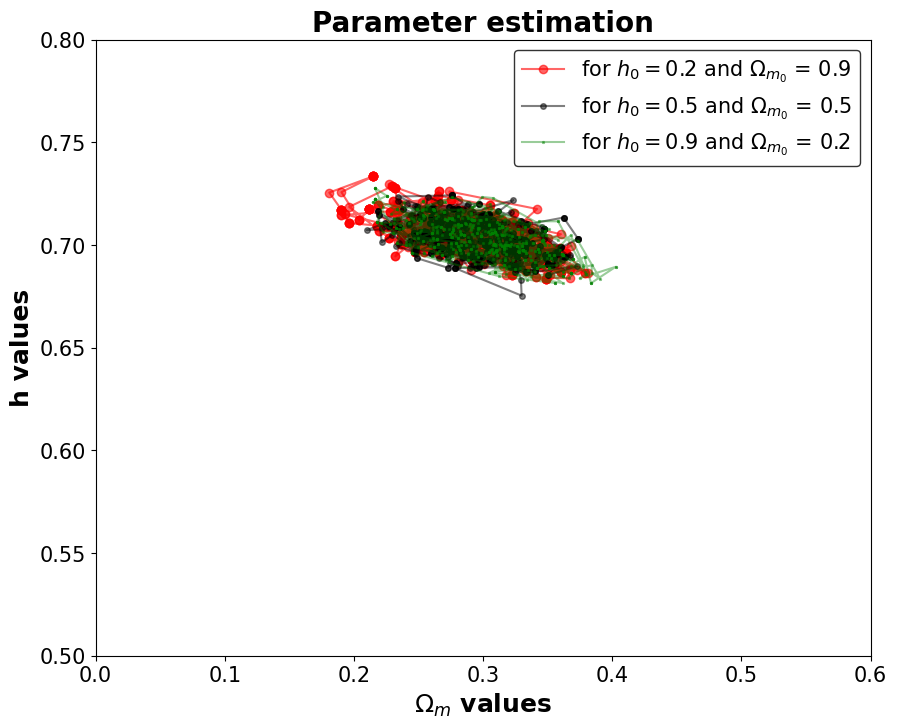

In [10]:
figure, ax = plt.subplots(figsize=(10,8))
ax.plot(omega_vals1,h_vals1,color='red',alpha=0.6,marker = 'o',ms=6,\
                                       label="for $h_0 = 0.2$ and $\Omega_{m_0}$ = 0.9")
ax.plot(omega_vals2,h_vals2,color='black',alpha=0.5,marker = 'o',ms=4,\
                                       label="for $h_0 = 0.5$ and $\Omega_{m_0}$ = 0.5")
ax.plot(omega_vals3,h_vals3,color='green',alpha=0.4,marker = '*',ms=2,\
                                        label="for $h_0 = 0.9$ and $\Omega_{m_0}$ = 0.2")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Parameter estimation",fontsize = 20,fontweight="bold")
plt.xlabel('$\Omega_m $ values',fontsize=18,fontweight = "bold")
plt.ylabel('h values',fontsize=18,fontweight = "bold")
ax.set_xlim(0,0.6)
ax.set_ylim(0.5,0.8)
plt.legend(fontsize = 15,facecolor = 'white',edgecolor = 'black',framealpha = 0.8)
plt.show()

### $\text{Animated Plots}$
 

In [3]:
 '''
 Basically this part of the code visually shows us step by step that whatever the initial values of ℎ & Ω𝑚 are,
 their final values will converge to the expected values of ℎ & Ω𝑚. but here is an possibility that this 
 animation run in jupyter notebook only. So please if possible than run this in jupyter notbook instead of
 google colab.
 '''

'\nBasically this part of the code visually shows us step by step that whatever the initial values of ℎ & Ω𝑚 are,\ntheir final values will converge to the expected values of ℎ & Ω𝑚. but here is an possibility that this \nanimation run in jupyter notebook only. So please if possible than run this in jupyter notbook instead of\ngoogle colab.\n'

In [11]:
%matplotlib tk

figure, ax = plt.subplots(figsize=(15,14))
ax.plot(omega_vals1[0],h_vals1[0],color='red',alpha=0.4,marker = 'o',ms=2,\
                                               label="for $h_0 = 0.2$ and $\Omega_{m_0}$ = 0.9")
ax.plot(omega_vals2[0],h_vals2[0],color='black',alpha=0.4,marker = 'o',ms=2,\
                                               label="for $h_0 = 0.5$ and $\Omega_{m_0}$ = 0.5")
ax.plot(omega_vals3[0],h_vals3[0],color='green',alpha=0.4,marker = 'o',ms=2,\
                                               label="for $h_0 = 0.9$ and $\Omega_{m_0}$ = 0.2")

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Parameter estimation",fontsize = 35,fontweight="bold")
plt.xlabel('$\Omega_m $ values',fontsize=18,fontweight = "bold")
plt.ylabel('h values',fontsize=18,fontweight = "bold")
ax.set_xlim(0.2,0.5)
ax.set_ylim(0.65,0.75)
plt.legend(fontsize =18,framealpha = 0.8,edgecolor = 'black',facecolor = 'white')
plt.show()

for i in range(1,500):
    ax.plot(omega_vals1[i],h_vals1[i],color='red',marker = 'o',alpha=0.4,ms=2)
    ax.plot(omega_vals2[i],h_vals2[i],color='black',marker = 'o',alpha=0.4,ms=2)
    ax.plot(omega_vals3[i],h_vals3[i],color='green',marker = 'o',alpha=0.4,ms=2)
    
    ax.plot([omega_vals1[i-1],omega_vals1[i]],[h_vals1[i-1],h_vals1[i]],color='red',ls='-',alpha=0.4,ms=3)
    ax.plot([omega_vals2[i-1],omega_vals2[i]],[h_vals2[i-1],h_vals2[i]],color='black',ls='-',alpha=0.4,ms=3)
    ax.plot([omega_vals3[i-1],omega_vals3[i]],[h_vals3[i-1],h_vals3[i]],color='green',ls='-',alpha=0.4,ms=3)
    if i == 300:
        plt.axvline(0.3,color='purple',lw = 3,ls = '--',ms = 3,label= '$\Omega_m$ = 0.3 line')
        plt.axhline(0.7,color='black',lw = 2.5,ls = '--',ms = 3,label = 'h = 0.7 line')
        plt.legend(fontsize =20,framealpha = 0.2,edgecolor = 'black')

    plt.pause(1.e-150)    ### to pause every step for little time(second) such that we can see all steps
plt.show()
    




## $\text{Statistics of above data}$

### $\text{Average Value of Estimated Parameters }$

In [12]:
### from above plot Acceptance ratio vs sigma, we can seen that acceptance ratio is decreasing with increasing 
# sigma,so we can take any value of variance in this decresing phase. 

## sigma[10:18] we can take one of them ;  let we are taking sigma[16]

h_final,omega_final,arr= MCMC(1000,0.1,0.9,0.3,0.3)
avg_h = np.mean(h_final)
avg_omega = np.mean(omega_final)
print('h =' ,avg_h,'omega =',avg_omega)

NameError: name 'sigma' is not defined

### $\text{Average,Variance & Covariance of estimated parameters}$

In [13]:
avg_h = np.mean(h_final)
avg_omega = np.mean(omega_final)

variance_h = np.var(h_final)
covariance_h = np.cov(h_final)

variance_omega = np.var(omega_final)
covariance_omega = np.cov(omega_final)

print("average value of h = ", avg_h)
print('average value of omega = ', avg_omega)

print('variance of h values = ',variance_h)
print('covariance of h values = ',covariance_h)

print('variance of omega values = ',variance_omega)
print('covariance of omega values = ',covariance_omega)

average value of h =  0.701708121280406
average value of omega =  0.30885289967180574
variance of h values =  4.6807583533667066e-05
covariance of h values =  4.6866166241468916e-05
variance of omega values =  0.0008832574434809295
covariance of omega values =  0.000884362897102307


# $\text{Part-2: Gelman-Rubin Convergence Test}$
 


In [23]:
steps_array = np.array([5,10,50,100,500,1000,10000])

sigma = 0.01

burn_in = np.array(steps_array*0.2,dtype='int')

L = steps_array - burn_in

chains = 50
GR_h_vals = np.zeros(len(steps_array))
GR_omega_vals = np.zeros(len(steps_array))

for n in range(len(steps_array)):
    
    chain_mean_h = np.zeros(chains) #Chain Mean h
    chain_mean_omega = np.zeros(chains) #Chain Mean Omega

    chain_var_h = np.zeros(chains) #within chain variance h
    chain_var_omega = np.zeros(chains) #within chain variance omega

    for i in range(chains):
        initial_h = np.random.uniform()
        initial_omega = np.random.uniform()
        
        h_vals_final , omega_vals_final,ar = MCMC(steps_array[n], initial_h, initial_omega, sigma, sigma)

        chain_mean_h[i] = np.mean(h_vals_final)
        chain_mean_omega[i] = np.mean(omega_vals_final)

        chain_var_h[i] = (1/(len(h_vals_final)-1))*(np.sum((h_vals_final - chain_mean_h[i])**2))
        chain_var_omega[i] = (1/(len(omega_vals_final)-1))*(np.sum((omega_vals_final - chain_mean_omega[i])**2))


    grand_mean_h = np.mean(chain_mean_h)
    grand_mean_omega = np.mean(chain_mean_omega)

    #Inter-Chain Variance
    B_h = (L[n]/(chains-1))*np.sum((chain_mean_h - grand_mean_h)**2) #np.var(grand_mean_h)
    #
    B_omega = (L[n]/(chains-1))*np.sum((chain_mean_omega - grand_mean_omega)**2)#np.var(grand_mean_omega)
    #

    W_h = np.mean(chain_var_h)
    W_omega = np.mean(chain_var_omega)

    #Gelman-Rubin Statistic

    GR_h_vals[n] = ((((L[n]-1)/L[n])*W_h) + (B_h/L[n]))/W_h
    GR_omega_vals[n] = ((((L[n]-1)/L[n])*W_omega) + (B_omega/L[n]))/W_omega
    

/tmp/ipykernel_2486/2383116601.py:30: RuntimeWarning: overflow encountered in exp
  acceptance_prob = min(1,np.exp(t2-t1)) # here we use exponantial because above we took log of likely hood


### $\text{plots}$

In [30]:
fig,ax = plt.subplots(nrows=1,ncols=2,sharex=True,sharey=True,
                      figsize=(14,8),dpi=120)
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)
ax1.set_facecolor('whitesmoke')
ax1.semilogx(steps_array,GR_h_vals,'ro--',markerfacecolor='k',lw=2.0,ms=8,
             label = 'Test for $h$ values with increasing steps')
ax2.set_facecolor('whitesmoke')
ax2.semilogx(steps_array,GR_omega_vals,'o--',color='brown',
            markerfacecolor='darkblue',lw=2.0,ms=8,label = 'Test for $\Omega$ values with increasing steps')

fig.suptitle("Gelman-Rubin Statistic",size=22,x=0.52,y=0.965)
fig.supylabel("GRS $\longrightarrow$",size=18,x=2.5e-2)

ax1.tick_params(axis='both',size=10,width=1.3,which='major')
ax1.tick_params(axis='both',size=6,width=0.8,which='minor')

ax2.tick_params(axis='y',size=0,width=1.3,which='major')
ax2.tick_params(axis='x',size=10,width=1.3,which='major')
ax2.tick_params(axis='both',size=6,width=0.8,which='minor')


ax1.set_xlabel("No. of Steps $\longrightarrow$",size=15)
ax2.set_xlabel("No. of Steps $\longrightarrow$",size=15)
plt.tight_layout(pad=2.5)
ax1.grid(color='grey',lw=0.5,alpha=0.6)
ax1.legend(fontsize=13)
ax2.grid(color='grey',lw=0.5,alpha=0.6)
ax2.legend(fontsize=13)